## Exercise 2.5

(programming) Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the q*( a) start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the q*( a) on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, α = 0.1. Use ε = 0.1 and longer runs, say of 10,000 steps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from problem import NonStationaryBanditProblem
from solver import epsilon_greedy

In [2]:
def solve(n_runs, problem_config, solver_config):
    k_arms = problem_config['k_arms']
    reward_std = problem_config['reward_std']
    change_std = problem_config['change_std']
    
    n_steps = solver_config['n_steps']
    epsilon = solver_config['epsilon']
    initial_value = solver_config['initial_value']
    step_size = solver_config['step_size']
    
    mean_optimal_action_rates = np.zeros(n_steps)
    mean_average_rewards = np.zeros(n_steps)
    
    for _ in tqdm(range(n_runs)):
        problem = NonStationaryBanditProblem(k_arms, reward_std, change_std)
        _, optimal_action_rates, average_rewards = epsilon_greedy(problem, n_steps, epsilon, initial_value, step_size)
        
        mean_optimal_action_rates += optimal_action_rates
        mean_average_rewards += average_rewards
    
    mean_optimal_action_rates /= n_runs
    mean_average_rewards /= n_runs
    return mean_optimal_action_rates*100, mean_average_rewards

In [3]:
N_RUNS = 50 # 2000回も試行すると時間がかかるので減らす

PROBLEM_CONFIG = {
    'k_arms': 10,
    'reward_std': 1,
    'change_std': 0.01
}

SOLVER_CONFIG_SA = {
    'n_steps': 10000,
    'epsilon': 0.1,
    'initial_value': 0.0,
    'step_size': -1
}

SOLVER_CONFIG_CS = {
    'n_steps': 10000,
    'epsilon': 0.1,
    'initial_value': 0.0,
    'step_size': 0.1
}

In [4]:
optimal_action_rates_sa, average_rewards_sa = solve(N_RUNS, PROBLEM_CONFIG, SOLVER_CONFIG_SA)
optimal_action_rates_cs, average_rewards_cs = solve(N_RUNS, PROBLEM_CONFIG, SOLVER_CONFIG_CS)

100%|████| 50/50 [00:46<00:00,  1.06it/s]


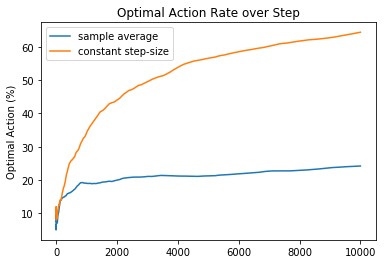

In [5]:
plt.title('Optimal Action Rate over Step')
plt.ylabel('Steps')
plt.ylabel('Optimal Action (%)')
plt.plot(optimal_action_rates_sa, label='sample average')
plt.plot(optimal_action_rates_cs, label='constant step-size')
plt.legend()
plt.show()

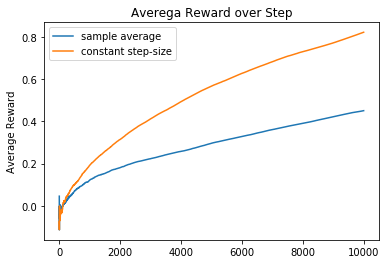

In [6]:
plt.title('Averega Reward over Step')
plt.ylabel('Steps')
plt.ylabel('Average Reward')
plt.plot(average_rewards_sa, label='sample average')
plt.plot(average_rewards_cs, label='constant step-size')
plt.legend()
plt.show()